<a href="https://colab.research.google.com/github/LoulouiseBipBip/PRA3024/blob/main/Assignement_Week4_ParticlePhysics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to Week 5!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. ![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access the [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine.
.

All being well - this should give no errors and we should have some kind of Gaussian distribution above.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/17323/files/3634864?module_item_id=644095

Then upload it directly. You can also run the following:

#Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce both particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are 524 [documented](http://pdg.lbl.gov/2014/listings/rpp2014-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable called H1_Ptot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install uproot awkward lz4 xxhash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.1/348.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.7/774.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.4/706.4 kB 17.1 MB/s eta 0:00:00


In [ ]:
import uproot
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


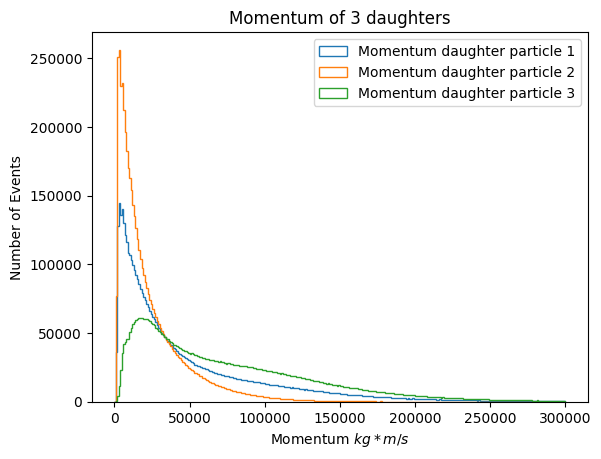

In [ ]:
#Here make a plot of the Total momentum of each of the three daughters
drive.mount('/content/drive')
f = uproot.open ("/content/drive/MyDrive/B2HHH_MagnetDown.root: DecayTree")
#Retrieving the 3-space momentum of each daughter particle
H1_PX = f["H1_PX"].array(library="np")
H1_PY = f["H1_PY"].array(library="np")
H1_PZ = f["H1_PZ"].array(library="np")

Ptot_H1 = sqrt(H1_PX**2 + H1_PY**2 + H1_PZ**2)

H2_PX = f["H2_PX"].array(library="np")
H2_PY = f["H2_PY"].array(library="np")
H2_PZ = f["H2_PZ"].array(library="np")

Ptot_H2 = sqrt(H2_PX**2 + H2_PY**2 + H2_PZ**2)

H3_PX = f["H3_PX"].array(library="np")
H3_PY = f["H3_PY"].array(library="np")
H3_PZ = f["H3_PZ"].array(library="np")

Ptot_H3 = sqrt(H1_PX**2 + H2_PY**2 + H3_PZ**2)
plt.hist(Ptot_H1,300, range = [0,300000], histtype = u'step', label="Momentum daughter particle 1")
plt.hist(Ptot_H2,300, range = [0,300000], histtype = u'step', label="Momentum daughter particle 2")
plt.hist(Ptot_H3,300, range = [0,300000], histtype = u'step', label="Momentum daughter particle 3")
plt.title("Momentum of 3 daughters")
plt.ylabel("Number of Events")
plt.xlabel("Momentum $kg*m/s$")
plt.legend()

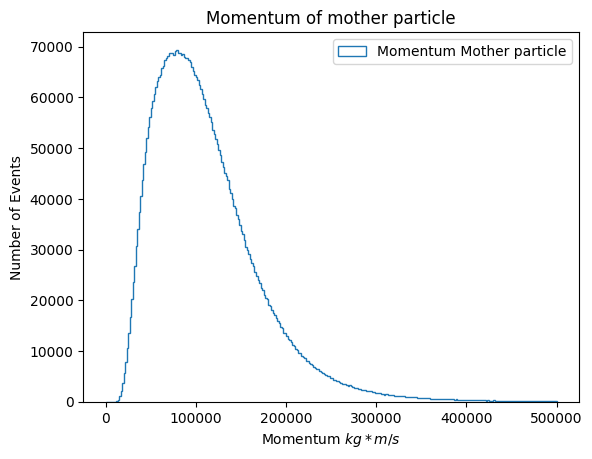

In [ ]:
#use the histogram plotting tools, plot the momentum of the mother
#Reconstructing the momentum
M_Ptot = sqrt((H1_PX + H1_PY + H1_PZ)**2 + (H2_PX + H2_PY + H2_PZ)**2 + (H3_PX + H3_PY + H3_PZ)**2)
plt.hist(M_Ptot,300, range = [0,500000], histtype = u'step', label="Momentum Mother particle")
plt.title("Momentum of mother particle")
plt.ylabel("Number of Events")
plt.xlabel("Momentum $kg*m/s$")
plt.legend()

Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [ ]:
#tree.Show(45)

We have now completed the initial steps and begun to work through what we need to with the data. This is a perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energy, we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

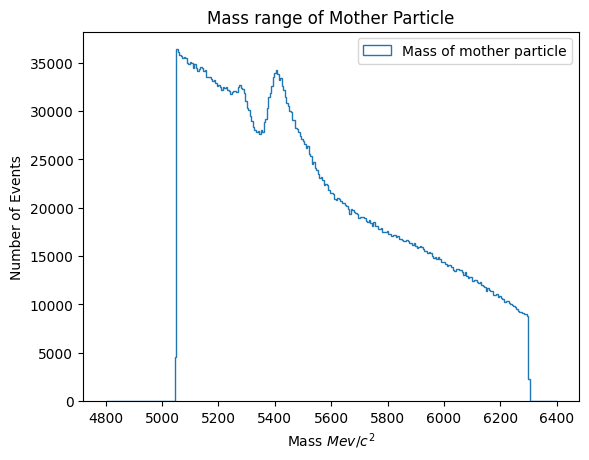

In [ ]:
#Now plot a histogram of the range of masses of the B meson.
#Does this match what we would expect from theory?
#Mass of kaon in MeV/c^2
mass_K = 493.677

#Calculating the total energy of each daughter particle using relativistic momentum relation
E_H1TOT = sqrt(mass_K**2 + sqrt(H1_PX**2 + H1_PY**2 + H1_PZ**2)**2)
E_H2TOT = sqrt(mass_K**2 + sqrt(H2_PX**2 + H2_PY**2 + H2_PZ**2)**2)
E_H3TOT = sqrt(mass_K**2 + sqrt(H3_PX**2 + H3_PY**2 + H3_PZ**2)**2)
#Total energy
E_TOT = E_H1TOT + E_H2TOT + E_H3TOT
#Total momentum
P_TOT = sqrt((H1_PX + H2_PX + H3_PX)**2 + (H1_PY + H2_PY + H3_PY)**2 + (H1_PZ + H2_PZ + H3_PZ)**2)

#Total mass
mass_m = sqrt(E_TOT**2 - P_TOT**2)

#Plot
plt.hist(mass_m,300, range = [4800,6400], histtype = u'step', label="Mass of mother particle")

plt.title("Mass range of Mother Particle")
plt.ylabel("Number of Events")
plt.xlabel("Mass $Mev/c^2$")
plt.legend()

We know that some of our particles are the B+ and some are the B- particle. There will also be some particles in our system that are not coming from a genuine B+/- or are a B+/- but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

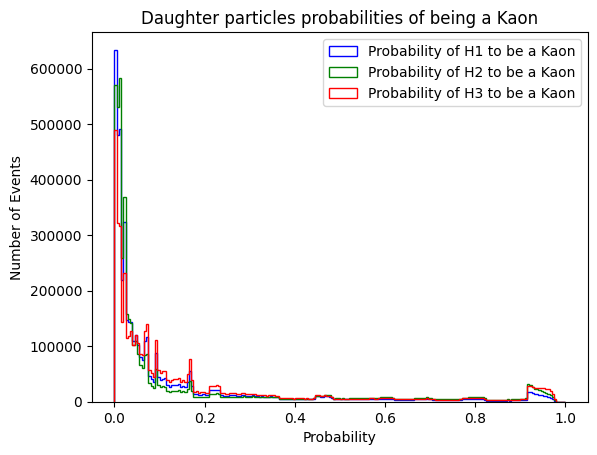

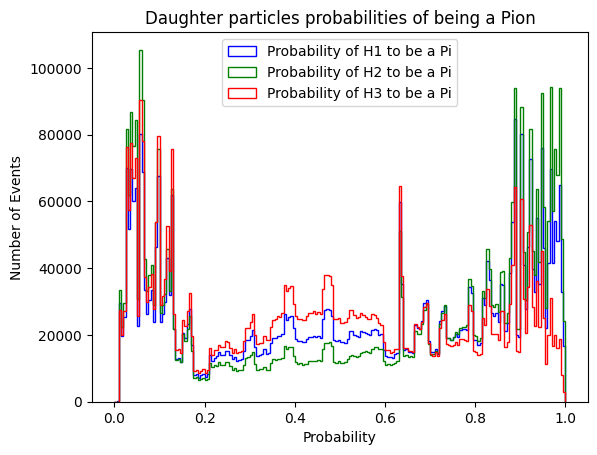

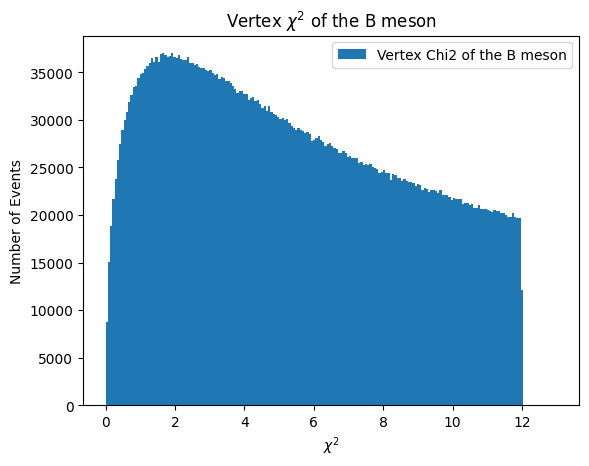

In [ ]:
#Retrieving the Kaon probabilities
H1_ProbK = f["H1_ProbK"].array(library="np")
H2_ProbK = f["H2_ProbK"].array(library="np")
H3_ProbK = f["H3_ProbK"].array(library="np")
#Make plots of H1/H2/H3 _ProbK on one plot
plt.hist(H1_ProbK, 200, range = [0,1], ec = "blue", histtype = u'step', label="Probability of H1 to be a Kaon")
plt.hist(H2_ProbK, 200, range = [0,1], ec = "green", histtype = u'step', label="Probability of H2 to be a Kaon")
plt.hist(H3_ProbK, 200, range = [0,1], ec = "red", histtype = u'step', label="Probability of H3 to be a Kaon")
plt.title("Daughter particles probabilities of being a Kaon")
plt.ylabel("Number of Events")
plt.xlabel("Probability")
plt.legend()
plt.figure()
#Retrieving the Pi probabilities
H1_ProbPi = f["H1_ProbPi"].array(library="np")
H2_ProbPi = f["H2_ProbPi"].array(library="np")
H3_ProbPi = f["H3_ProbPi"].array(library="np")
#Make plots of H1/H2/H3 _ProbPi on one plot
plt.hist(H1_ProbPi, 200, range = [0,1], ec = "blue", histtype = u'step', label="Probability of H1 to be a Pi")
plt.hist(H2_ProbPi, 200, range = [0,1], ec = "green", histtype = u'step', label="Probability of H2 to be a Pi")
plt.hist(H3_ProbPi, 200, range = [0,1], ec = "red", histtype = u'step', label="Probability of H3 to be a Pi")
plt.title("Daughter particles probabilities of being a Pion")
plt.ylabel("Number of Events")
plt.xlabel("Probability")
plt.legend()
plt.figure()
#For all our particles, make a plot of the B_VertexChi2
B_VertexChi2 = f["B_VertexChi2"].array(library="np")
plt.hist(B_VertexChi2, 200, range = [0, 13], label="Vertex Chi2 of the B meson")
plt.title("Vertex $\chi^2$ of the B meson")
plt.xlabel("$\chi^2$")
plt.ylabel("Number of Events")
plt.legend()

Using these plots, we can now make a preselection string. This is a text string that looks like

In [ ]:
#This example is for each daughter particle to have a Probability of being a Pion being more than 90% and H1 to not be a muon
#This is not a good choice of selection - you should make your own :)
#selection=("H1_ProbPi>0.9&H2_ProbPi>0.9&H3_ProbPi>0.9&!H1_isMuon&H2_isElectron&H3_isElephant")

Text(0.5, 0, 'Mass $Mev/c^2$')

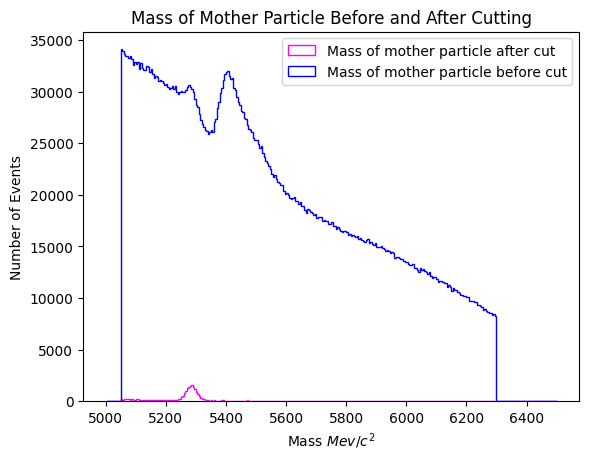

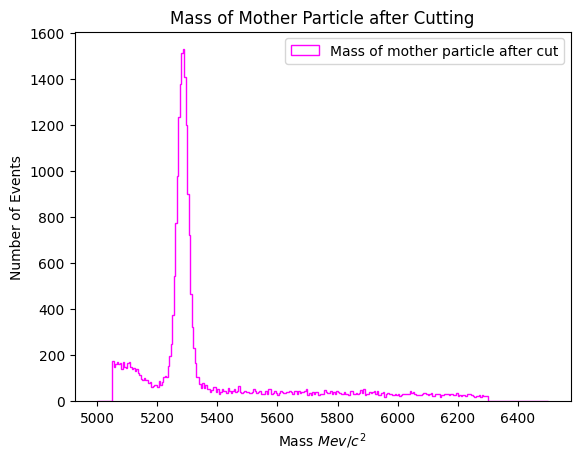

In [ ]:
#To apply the selection - we can use the copytree command:
#selection=("H1_ProbK>0.9")
#CutTree=tree.CopyTree(selection)

#So now we take our data in tree and apply selection to it (so only events which comply with those rules are kept) and put the new data in CutTree
#My own selection
selection = f.arrays(cut="(H1_isMuon==0)&(H1_ProbK>0.3)&(H1_ProbPi<0.5)&(H2_isMuon==0)&(H2_ProbK>0.3)&(H2_ProbPi<0.5)&(H3_isMuon==0)&(H3_ProbK>0.3)&(H3_ProbPi<0.5)", library="np")

#Same calculations with cut data
E_H1TOT_Cut = sqrt(mass_K**2 + sqrt(selection["H1_PX"]**2 + selection["H1_PY"]**2 + selection["H1_PZ"]**2)**2)
E_H2TOT_Cut = sqrt(mass_K**2 + sqrt(selection["H2_PX"]**2 + selection["H2_PY"]**2 + selection["H2_PZ"]**2)**2)
E_H3TOT_Cut = sqrt(mass_K**2 + sqrt(selection["H3_PX"]**2 + selection["H3_PY"]**2 + selection["H3_PZ"]**2)**2)

E_TOT_Cut = E_H1TOT_Cut + E_H2TOT_Cut + E_H3TOT_Cut

P_TOTCUT = sqrt((selection["H1_PX"] + selection["H2_PX"] + selection["H3_PX"])**2 + (selection["H1_PY"] + selection["H2_PY"] + selection["H3_PY"])**2 + (selection["H1_PZ"] + selection["H2_PZ"] + selection["H3_PZ"])**2)

#Calculating the mass of the mother particle using relativistic momentum relation
mass_m_Cut = sqrt(E_TOT_Cut**2 - P_TOTCUT**2)

#Plot of the cut
plt.hist(mass_m_Cut, 300, ec = "magenta", histtype = u"step", range = [5000,6500], label="Mass of mother particle after cut")
#Plot of the pre-cut
plt.hist(mass_m, 300, ec = "blue", histtype = u"step", range = [5000, 6500], label="Mass of mother particle before cut")

#Adding titles
plt.title("Mass of Mother Particle Before and After Cutting")
plt.legend()
plt.ylabel("Number of Events")
plt.xlabel("Mass $Mev/c^2$")
plt.figure()
plt.hist(mass_m_Cut, 300, ec = "magenta", histtype = u"step", range = [5000,6500], label="Mass of mother particle after cut")
plt.title("Mass of Mother Particle after Cutting")
plt.legend()
plt.ylabel("Number of Events")
plt.xlabel("Mass $Mev/c^2$")

In [ ]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the tree (pre-cuts) and the CutTree (post-cuts)
#What do you notice about your histogram now?
print("We notice that the histogram of the cut mass is very small compared to the original one, however it is not zero and reaches its maximum for a mass ~ 5300MeV")

We notice that the histogram of the cut mass is very small compared to the original one, however it is not zero and reaches its maximum for a mass ~ 5300MeV


#How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

In [ ]:
!pip install lmfit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 9.5 MB/s eta 0:00:00


Yield value: 324709.32080595917
Chi-square value: 3522228.883790047


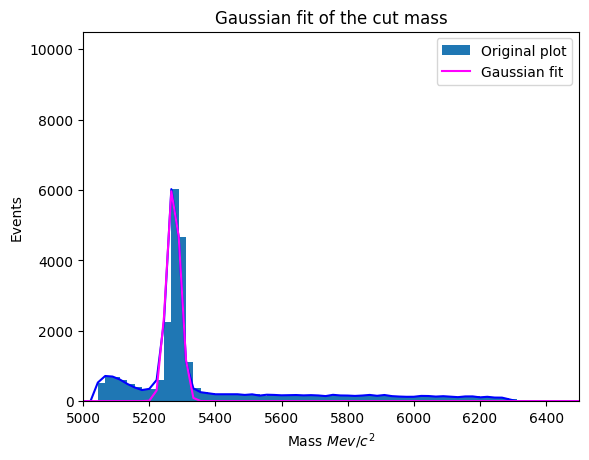

In [25]:
#Gaussian model
from scipy.optimize import curve_fit
from lmfit.models import GaussianModel, ExponentialModel

events, mass, var = plt.hist(mass_m_Cut, 450, (0,10000), label = "Original plot")

gauss_mod = GaussianModel(independant_vars = ['massg'],prefix = 'gauss_')

PARAMETERS = gauss_mod.make_params(gauss_center= 5280,gauss_amplitude = 5000,gauss_sigma = 6.0)

model_fitg = gauss_mod.fit(events, PARAMETERS, x=mass[:-1])

#Ploting
plt.plot(mass[:-1], events, 10000, color = "blue")
plt.plot(mass[:-1], model_fitg.best_fit, color = 'magenta', label = "Gaussian fit")
plt.xlim(5000,6500)
plt.legend()

plt.title("Gaussian fit of the cut mass")
plt.ylabel("Events")
plt.xlabel("Mass $Mev/c^2$")

print("Yield value: " + str(model_fitg.params['gauss_amplitude'].value))
fitted_yield_KKPplus = model_fitg.params['gauss_amplitude'].value
print("Chi-square value: " + str(model_fitg.chisqr))

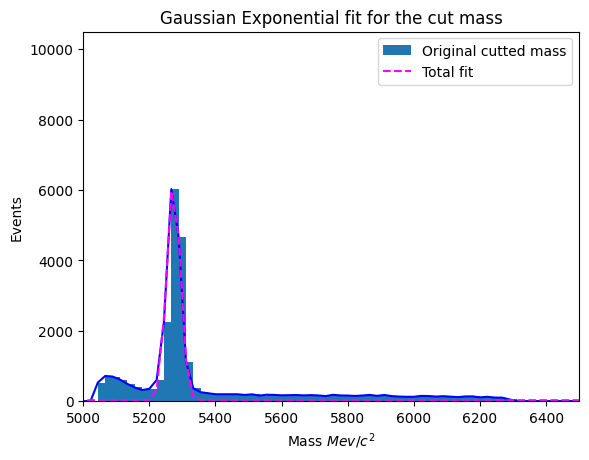

Yield values: 6244.196678557835
Chi-square value: 3237556.3307872163
This is a better fit than only the Gaussian


In [32]:
from lmfit.models import Model

# Define a custom function for Gaussian Exponential fit
def custom_fit_function(x, amp_g, cen_g, sigma_g, amp_e, decay_e):
    gaussian_component = amp_g * np.exp(-(x - cen_g)**2 / (2 * sigma_g**2))
    exponential_component = amp_e * np.exp(-decay_e * x)
    return gaussian_component + exponential_component

custom_model = Model(custom_fit_function)
events, mass, var = plt.hist(mass_m_Cut, 450, (0, 10000), label="Original cutted mass")

#Initial guess
initial_params = custom_model.make_params(amp_g=5200, cen_g=5280, sigma_g=4.2, amp_e=100, decay_e=0.001)

#Fitting data to parameters
result = custom_model.fit(events, initial_params, x=mass[:-1])

#Plot the data
plt.hist(mass_m_Cut, 450, (0, 10000), color='tab:blue', alpha=0.5)
plt.plot(mass[:-1], events, 10000, color = "blue")
#Plot the fit
plt.plot(mass[:-1], result.eval_components()['custom_fit_function'], '--', color='magenta', label="Total fit")

plt.legend()
plt.title("Gaussian Exponential fit for the cut mass")
plt.xlabel("Mass $Mev/c^2$")
plt.ylabel("Events")
plt.xlim(5000, 6500)
plt.show()

print("Yield values: " + str(result.params['amp_g'].value))
fitted_yield_KKPplusGE = result.params['amp_g'].value
print("Chi-square value: " + str(result.chisqr))
if result.chisqr < model_fitg.chisqr:
  print("This is a better fit than only the Gaussian")
elif result.chisqr > model_fitg.chisqr:
  print("The Gaussian only was a better fit")

Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do all):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

We can use the .getValV() function on our signal and background *normalisation* components, e.g. Gauss_Norm=Gauss.getValV()

To find the error (on this number) we can use .getError()

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

#Counting

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

In [33]:
# Event Classification

# Initialize arrays to store B minus and B plus events
B_minus_events = []
B_plus_events = []
Discard_data = []

# Extract charges of H1, H2, and H3 from the dataset
H1_charge = f["H1_Charge"].array(library="np")
H2_charge = f["H2_Charge"].array(library="np")
H3_charge = f["H3_Charge"].array(library="np")

# Create a 2D array by transposing the charges of H1, H2, and H3
Charge_Data = transpose([H1_charge, H2_charge, H3_charge])

# Classify events as B+ or B- based on charge conditions
for charge_sum in Charge_Data:
    if sum(charge_sum) == 1:
        B_plus_events.append(charge_sum)
    elif sum(charge_sum) == -1:
        B_minus_events.append(charge_sum)

# Identify data to discard based on specific conditions
for discard_data_condition in Charge_Data:
    if sum(discard_data_condition) == 3 or sum(discard_data_condition) == -3:
        Discard_data.append(discard_data_condition)


Text(0.5, 0, 'Mass $Mev/c^2$')

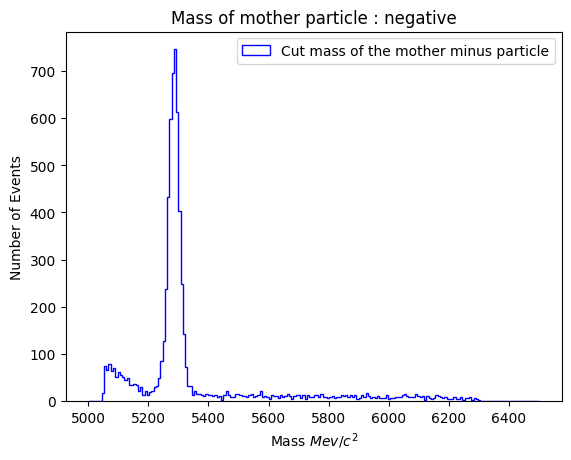

In [36]:
# Data Separation - B+ and B-

cut_condition_minus = "(H1_isMuon==0)&(H1_ProbK>0.5)&(H1_ProbPi<0.5)&(H2_isMuon==0)&(H2_ProbK>0.5)&(H2_ProbPi<0.5)&(H3_isMuon==0)&(H3_ProbK>0.5)&(H3_ProbPi<0.5)&(H1_Charge == 1)&(H2_Charge == -1)&(H3_Charge == -1)"
cut_condition_plus = "(H1_isMuon==0)&(H1_ProbK>0.5)&(H1_ProbPi<0.5)&(H2_isMuon==0)&(H2_ProbK>0.5)&(H2_ProbPi<0.5)&(H3_isMuon==0)&(H3_ProbK>0.5)&(H3_ProbPi<0.5)&(H1_Charge == -1)&(H2_Charge == 1)&(H3_Charge == 1)"

# Separate data into B+ and B- based on the analysis from the previous block
Tree_Cut_minus_data = f.arrays(cut=cut_condition_minus, library="np")
Tree_Cut_plus_data = f.arrays(cut=cut_condition_plus, library="np")

# Calculate mass of the mother minus particle using the new cut data
E_H1TOT_Cut_minus = sqrt(mass_K**2 + sqrt(Tree_Cut_minus_data["H1_PX"]**2 + Tree_Cut_minus_data["H1_PY"]**2 + Tree_Cut_minus_data["H1_PZ"]**2)**2)
E_H2TOT_Cut_minus = sqrt(mass_K**2 + sqrt(Tree_Cut_minus_data["H2_PX"]**2 + Tree_Cut_minus_data["H2_PY"]**2 + Tree_Cut_minus_data["H2_PZ"]**2)**2)
E_H3TOT_Cut_minus = sqrt(mass_K**2 + sqrt(Tree_Cut_minus_data["H3_PX"]**2 + Tree_Cut_minus_data["H3_PY"]**2 + Tree_Cut_minus_data["H3_PZ"]**2)**2)

# Calculate the total energy of the mother minus particle
E_TOT_Cut_minus = E_H1TOT_Cut_minus + E_H2TOT_Cut_minus + E_H3TOT_Cut_minus

# Assign the total cut momentum into a variable
P_TOTCUT_minus = sqrt((Tree_Cut_minus_data["H1_PX"] + Tree_Cut_minus_data["H2_PX"] + Tree_Cut_minus_data["H3_PX"])**2 + (Tree_Cut_minus_data["H1_PY"] + Tree_Cut_minus_data["H2_PY"] + Tree_Cut_minus_data["H3_PY"])**2 + (Tree_Cut_minus_data["H1_PZ"] + Tree_Cut_minus_data["H2_PZ"] + Tree_Cut_minus_data["H3_PZ"])**2)

# Calculate the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Cut_minus = sqrt(E_TOT_Cut_minus**2 - P_TOTCUT_minus**2)

# Plot the cut mass of the mother minus particle
plt.hist(mass_mother_Cut_minus, 200, ec="blue", histtype=u"step", range=[5000, 6500], label="Cut mass of the mother minus particle")

# Add titles and labels
plt.title("Mass of mother particle : negative")
plt.legend()
plt.ylabel("Number of Events")
plt.xlabel("Mass $Mev/c^2$")


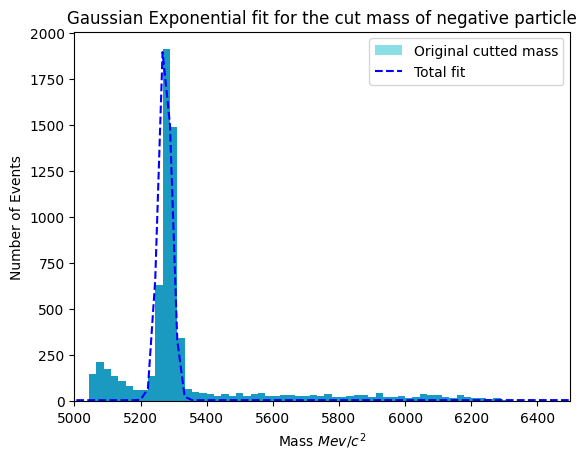

Yield values: 6244.196678557835
Chi-square value: 3237556.3307872163


In [42]:
# Define a custom function for Gaussian Exponential fit
def custom_fit_function(x, amp_g, cen_g, sigma_g, amp_e, decay_e):
    gaussian_component = amp_g * np.exp(-(x - cen_g)**2 / (2 * sigma_g**2))
    exponential_component = amp_e * np.exp(-decay_e * x)
    return gaussian_component + exponential_component

custom_model = Model(custom_fit_function)
events, mass, var = plt.hist(mass_mother_Cut_minus, 450, (0, 10000))

##Initial guess
initial_params = custom_model.make_params(amp_g=5000, cen_g=5280, sigma_g=4.2, amp_e=100, decay_e=0.001)

#Fitting data to parameters
resultminus = custom_model.fit(events, initial_params, x=mass[:-1])

#Plot the data
plt.hist(mass_mother_Cut_minus, 450, (0, 10000), color='tab:cyan', alpha=0.5, label="Original cutted mass")

#Plot the fit
plt.plot(mass[:-1], resultminus.eval_components()['custom_fit_function'], '--', color='blue', label="Total fit")

plt.legend()
plt.title("Gaussian Exponential fit for the cut mass of negative particle")
plt.xlabel("Mass $Mev/c^2$")
plt.ylabel("Number of Events")
plt.xlim(5000, 6500)
plt.show()


print("Yield values: " + str(result.params['amp_g'].value))
fitted_yield_minus = resultminus.params['amp_g'].value
print("Chi-square value: " + str(result.chisqr))


Text(0.5, 0, 'Mass $Mev/c^2$')

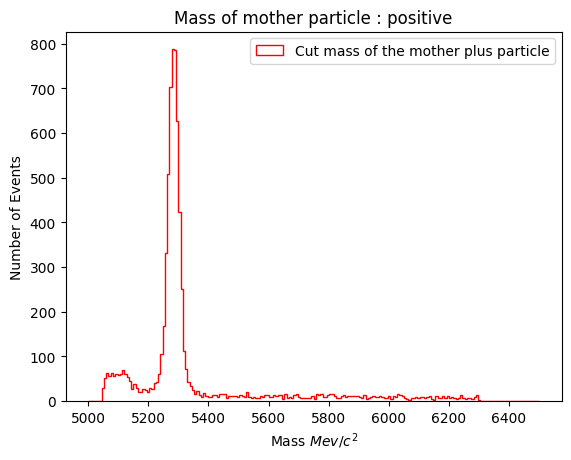

In [39]:
#Same goes for the plus
E_H1TOT_Cut_plus = sqrt(mass_K**2 + sqrt(Tree_Cut_plus_data["H1_PX"]**2 + Tree_Cut_plus_data["H1_PY"]**2 + Tree_Cut_plus_data["H1_PZ"]**2)**2)
E_H2TOT_Cut_plus = sqrt(mass_K**2 + sqrt(Tree_Cut_plus_data["H2_PX"]**2 + Tree_Cut_plus_data["H2_PY"]**2 + Tree_Cut_plus_data["H2_PZ"]**2)**2)
E_H3TOT_Cut_plus = sqrt(mass_K**2 + sqrt(Tree_Cut_plus_data["H3_PX"]**2 + Tree_Cut_plus_data["H3_PY"]**2 + Tree_Cut_plus_data["H3_PZ"]**2)**2)

#Total energy
E_TOT_Cut_plus = E_H1TOT_Cut_plus + E_H2TOT_Cut_plus + E_H3TOT_Cut_plus

#Total momentum
P_TOTCUT_plus = sqrt((Tree_Cut_plus_data["H1_PX"] + Tree_Cut_plus_data["H2_PX"] + Tree_Cut_plus_data["H3_PX"])**2 + (Tree_Cut_plus_data["H1_PY"] + Tree_Cut_plus_data["H2_PY"] + Tree_Cut_plus_data["H3_PY"])**2 + (Tree_Cut_plus_data["H1_PZ"] + Tree_Cut_plus_data["H2_PZ"] + Tree_Cut_plus_data["H3_PZ"])**2)

#Calculate the mass of the mother minus particle using relativistic momentum relation
mass_mother_Cut_plus = sqrt(E_TOT_Cut_plus**2 - P_TOTCUT_plus**2)

#Plot
plt.hist(mass_mother_Cut_plus, 200, ec="red", histtype=u"step", range=[5000, 6500], label="Cut mass of the mother plus particle")
plt.title("Mass of mother particle : positive")
plt.legend()
plt.ylabel("Number of Events")
plt.xlabel("Mass $Mev/c^2$")


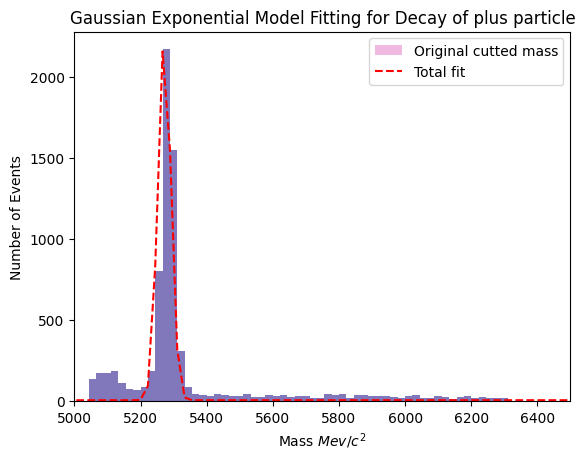

Yield values: 2235.3191282705297
Chi-square value: 3237556.3307872163


In [43]:
# Define a custom function for Gaussian Exponential fit
def custom_fit_function(x, amp_g, cen_g, sigma_g, amp_e, decay_e):
    gaussian_component = amp_g * np.exp(-(x - cen_g)**2 / (2 * sigma_g**2))
    exponential_component = amp_e * np.exp(-decay_e * x)
    return gaussian_component + exponential_component

custom_model = Model(custom_fit_function)

# Assign events and mass data from the cut mother particle mass to x & y data
events, mass, var = plt.hist(mass_mother_Cut_plus, 450, (0, 10000))

# Set initial guesses for the parameters
initial_params = custom_model.make_params(amp_g=5000, cen_g=5280, sigma_g=4.2, amp_e=100, decay_e=0.001)

# Fit the data to the custom model using the parameters
resultplus = custom_model.fit(events, initial_params, x=mass[:-1])

# Plot the original data
plt.hist(mass_mother_Cut_plus, 450, (0, 10000), color='tab:pink', alpha=0.5, label="Original cutted mass")

# Plot the Gaussian and Exponential components
plt.plot(mass[:-1], resultplus.eval_components()['custom_fit_function'], '--', color='red', label="Total fit")

plt.legend()
plt.title("Gaussian Exponential Model Fitting for Decay of plus particle")
plt.xlabel("Mass $Mev/c^2$")
plt.ylabel("Number of Events")
plt.xlim(5000, 6500)
plt.show()

print("Yield values: " + str(resultplus.params['amp_g'].value))
fitted_yield_plus = resultplus.params['amp_g'].value
print("Chi-square value: " + str(result.chisqr))

In [41]:
#Now calculating the asymmetry number

Asymmetry = (fitted_yield_minus - fitted_yield_plus)/(fitted_yield_minus + fitted_yield_plus)

#Sigma uncertainty
sigma= sqrt((1-Asymmetry**2)/(fitted_yield_minus + fitted_yield_plus))

print("The value of the asymmetry is: " + str(Asymmetry))
print("The value of the uncertainty is: " + str(sigma))


The value of the asymmetry is: -0.05018221658378884
The value of the uncertainty is: 0.015307351080409162


#Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [ ]:
#Define a function to find the invarient mass of two given Kaons

In [ ]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your scatter

We can further improve our plot, since two sets of particles on each axis are exactly the same (one positive Kaon, one negative Kaon). So we can plot the maximum of the two values on one axis and the minimum on the other. We can use a quick numpy check and then plot those values.

In [ ]:
#Make the revised Dalitz plot here for B+ mesons

In [ ]:
#Make the revised Dalitz plot here for B- mesons

In [ ]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)